In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
from __future__ import division

In [2]:
tn01 = pd.read_table("/DAS_Storage1/aschoi/data/Drug_Repositioning/8_new_training/PREDICT_data/3_1_tn_whole_descriptor_predict.tsv")
tn005 = pd.read_table("/DAS_Storage1/aschoi/data/Drug_Repositioning/8_new_training/PREDICT_data/3_1_tn_whole_descriptor_005_predict.tsv")

In [3]:
print len(tn01)
print len(tn005)

10183
21337


In [4]:
df_pos01 = tn01[tn01.association == 1]
df_neg01 = tn01[tn01.association == 0]
df_pos005 = tn005[tn005.association == 1]
df_neg005 = tn005[tn005.association == 0]

In [5]:
features = tn01.columns.values[3:].tolist()
pos01 = df_pos01[features]
neg01 = df_neg01[features]
pos005 = df_pos005[features]
neg005 = df_neg005[features]

In [6]:
pos_feature_sum01 = pos01.sum(axis=0)
neg_feature_sum01 = neg01.sum(axis=0)
pos_feature_sum005 = pos005.sum(axis=0)
neg_feature_sum005 = neg005.sum(axis=0)

In [7]:
df_pos_sum01 = pd.DataFrame({'feature' : pos_feature_sum01.index.values, 'sum' : pos_feature_sum01.values})
df_neg_sum01 = pd.DataFrame({'feature' : neg_feature_sum01.index.values, 'sum' : neg_feature_sum01.values})
df_pos_sum005 = pd.DataFrame({'feature' : pos_feature_sum005.index.values, 'sum' : pos_feature_sum005.values})
df_neg_sum005 = pd.DataFrame({'feature' : neg_feature_sum005.index.values, 'sum' : neg_feature_sum005.values})

In [8]:
print len(neg01)
print len(neg005)

8821
19975


In [10]:
#### Labplace Smoothing
numP01 = len(pos01)
numN01 = len(neg01)
LapP01 = (numP01 +1) / (numP01 + numN01 + 2)
LapN01 = (numN01 +1 ) / (numP01 + numN01 + 2)

numP005 = len(pos005)
numN005 = len(neg005)
LapP005 = (numP005 +1) / (numP005 + numN005 + 2)
LapN005 = (numN005 +1 ) / (numP005 + numN005 + 2)

In [11]:
# P(Feature | Positive), P(Feature | Negative)
LapF_P01 = (df_pos_sum01['sum'] + 1) / (numP01 + 2)
LapF_N01 = (df_neg_sum01['sum'] + 1) / (numN01 + 2)
LapF_P005 = (df_pos_sum005['sum'] + 1) / (numP005 + 2)
LapF_N005 = (df_neg_sum005['sum'] + 1) / (numN005 + 2)

In [12]:
# P(Positive | Featue), P(Negative | Feature) : positive일 경우  (LapF_P * LapP) / (LapF_P * LapP + LapF_N + LapN)
LapP_F01 = (LapF_P01 * LapP01) / (LapF_P01 * LapP01 + LapF_N01 * LapN01)
LapN_F01 = (LapF_N01 * LapN01) / (LapF_P01 * LapP01 + LapF_N01 * LapN01)
# P(Positive | Featue), P(Negative | Feature) : positive일 경우  (LapF_P * LapP) / (LapF_P * LapP + LapF_N + LapN)
LapP_F005 = (LapF_P005 * LapP005) / (LapF_P005 * LapP005 + LapF_N005 * LapN005)
LapN_F005 = (LapF_N005 * LapN005) / (LapF_P005 * LapP005 + LapF_N005 * LapN005)

In [13]:
print LapP_F01.max()
print LapP_F01.max()
print LapP_F005.max()
print LapP_F005.max()

0.996209780676
0.996209780676
0.996209541703
0.996209541703


In [14]:
# Log odds ratio
odds01 = np.log2(LapP_F01) - np.log2(LapN_F01)
print odds01.min()
print odds01.max()
# Log odds ratio
odds005 = np.log2(LapP_F005) - np.log2(LapN_F005)
print odds005.min()
print odds005.max()

-6.62294637716
8.03802443159
-7.51273851638
8.03793312668


/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


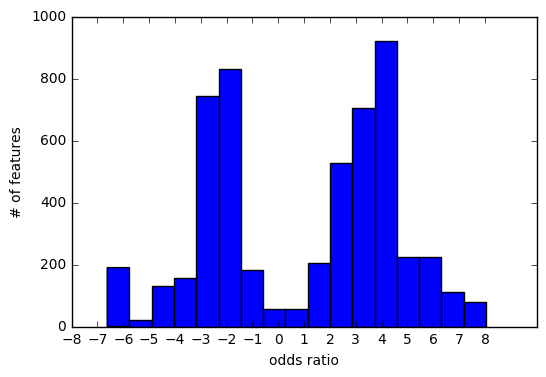

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import plotly.plotly as py
%matplotlib inline
num_bins = 17
plt.hist(odds01, num_bins)
plt.xticks(np.arange(-8, 9, 1))
plt.xlabel("odds ratio")
plt.ylabel("# of features")

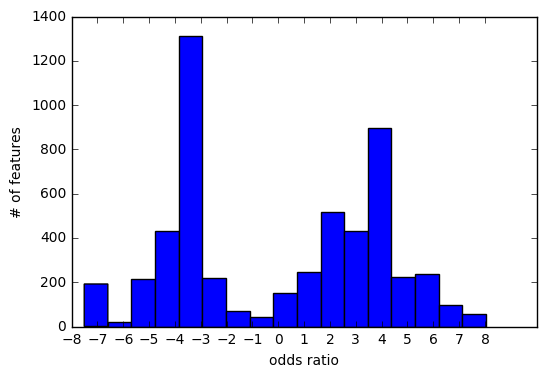

In [16]:
%matplotlib inline
num_bins = 17
plt.hist(odds005, num_bins)
plt.xticks(np.arange(-8, 9, 1))
plt.xlabel("odds ratio")
plt.ylabel("# of features")

In [24]:
df_odds01 = pd.DataFrame({'feature' : features, 'odds' : odds01})
df_odds005 = pd.DataFrame({'feature' : features, 'odds' : odds005})

In [25]:
df_odds01.to_csv("/home/share/aschoi/nas/users/asolchoi/data/Drug_Repositioning/7_new_association/PREDICT_data/8_odds01_by_feature.tsv", sep='\t', index=False)
df_odds01.to_csv("/DAS_Storage1/aschoi/data/Drug_Repositioning/7_new_association/PREDICT_data/8_odds01_by_feature.tsv", sep='\t', index=False)
df_odds005.to_csv("/home/share/aschoi/nas/users/asolchoi/data/Drug_Repositioning/7_new_association/PREDICT_data/8_odds005_by_feature.tsv", sep='\t', index=False)
df_odds005.to_csv("/DAS_Storage1/aschoi/data/Drug_Repositioning/7_new_association/PREDICT_data/8_odds005_by_feature.tsv", sep='\t', index=False)

In [27]:
#positive feature를 전부 고려했을 시의 negative association
filtered = df_odds01[df_odds01.odds > 0]
feature_ids = filtered['feature'].tolist()
print len(filtered)
print 'start : ' + datetime.now().strftime('%Y-%m-%d %H:%M:%S')
for i in range(len(filtered)):
    feature_id = feature_ids[i]
    if i ==0 :
        temp = df_neg01[df_neg01[feature_id] == 0] # positive feature가 0인 negative association 
    else:
        temp = temp[temp[feature_id] == 0]
print 'start : ' + datetime.now().strftime('%Y-%m-%d %H:%M:%S')
print len(temp)

3065
start : 2017-03-28 10:12:38
start : 2017-03-28 10:17:35
6233


In [28]:
frames = [temp, df_pos01]
bayesiand_descriptor01 = pd.concat(frames)

In [30]:
print len(temp), len(pos01), len(bayesiand_descriptor01)

 6233 1362 7595


In [32]:
bayesiand_descriptor01.to_csv("/DAS_Storage1/aschoi/data/Drug_Repositioning/8_new_training/PREDICT_data/4_1_tn_whole_descriptor_bayesian_predict.tsv", sep='\t', index=False)

In [33]:
#positive feature를 전부 고려했을 시의 negative association
filtered = df_odds005[df_odds005.odds > 0]
feature_ids = filtered['feature'].tolist()
print len(filtered)
print 'start : ' + datetime.now().strftime('%Y-%m-%d %H:%M:%S')
for i in range(len(filtered)):
    feature_id = feature_ids[i]
    if i ==0 :
        temp = df_neg005[df_neg005[feature_id] == 0] # positive feature가 0인 negative association 
    else:
        temp = temp[temp[feature_id] == 0]
print 'start : ' + datetime.now().strftime('%Y-%m-%d %H:%M:%S')
print len(temp)

2855
start : 2017-03-28 10:49:03
start : 2017-03-28 11:03:21
18155


In [34]:
frames = [temp, df_pos005]
bayesiand_descriptor005 = pd.concat(frames)

In [35]:
print len(temp), len(pos01), len(bayesiand_descriptor01)

18155 1362 7595


In [36]:
bayesiand_descriptor005.to_csv("/DAS_Storage1/aschoi/data/Drug_Repositioning/8_new_training/PREDICT_data/4_1_tn_whole_descriptor_005_bayesian_predict.tsv", sep='\t', index=False)

In [2]:
tn_local = pd.read_table("/DAS_Storage1/aschoi/data/Drug_Repositioning/8_new_training/PREDICT_data/3_2_tn_local_descriptor.tsv")

In [3]:
df_pos = tn_local[tn_local.association == 1]
df_neg = tn_local[tn_local.association == 0]

features = tn_local.columns.values[3:].tolist()
pos = df_pos[features]
neg = df_neg[features]

pos_feature_sum = pos.sum(axis=0)
neg_feature_sum = neg.sum(axis=0)

df_pos_sum = pd.DataFrame({'feature' : pos_feature_sum.index.values, 'sum' : pos_feature_sum.values})
df_neg_sum = pd.DataFrame({'feature' : neg_feature_sum.index.values, 'sum' : neg_feature_sum.values})
print len(neg)

#### Labplace Smoothing
numP = len(pos)
numN = len(neg)
LapP = (numP +1) / (numP + numN + 2)
LapN = (numN +1 ) / (numP + numN + 2)

# P(Feature | Positive), P(Feature | Negative)
LapF_P = (df_pos_sum['sum'] + 1) / (numP + 2)
LapF_N = (df_neg_sum['sum'] + 1) / (numN + 2)

# P(Positive | Featue), P(Negative | Feature) : positive일 경우  (LapF_P * LapP) / (LapF_P * LapP + LapF_N + LapN)
LapP_F = (LapF_P * LapP) / (LapF_P * LapP + LapF_N * LapN)
LapN_F = (LapF_N * LapN) / (LapF_P * LapP + LapF_N * LapN)

# Log odds ratio
odds = np.log2(LapP_F) - np.log2(LapN_F)
print odds.min()
print odds.max()

12887
-7.79536201196
1.23535187776


/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


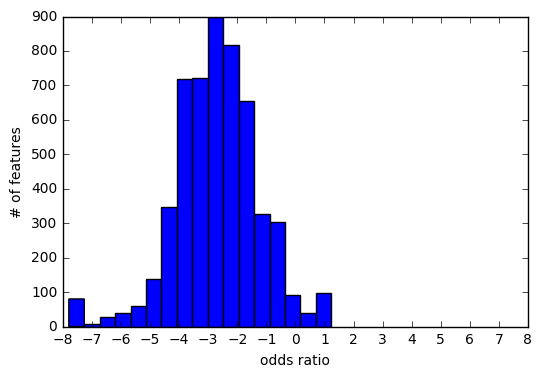

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import plotly.plotly as py
%matplotlib inline
num_bins = 17
plt.hist(odds, num_bins)
plt.xticks(np.arange(-8, 9, 1))
plt.xlabel("odds ratio")
plt.ylabel("# of features")

In [9]:
df_odds = pd.DataFrame({'feature' : features, 'odds' : odds})

df_odds.to_csv("/home/share/aschoi/nas/users/asolchoi/data/Drug_Repositioning/7_new_association/PREDICT_data/8_2_odds_local_by_feature.tsv", sep='\t', index=False)
df_odds.to_csv("/DAS_Storage1/aschoi/data/Drug_Repositioning/7_new_association/PREDICT_data/8_2_odds_local_by_feature.tsv", sep='\t', index=False)

In [10]:
#positive feature를 전부 고려했을 시의 negative association
filtered = df_odds[df_odds.odds > 0]
feature_ids = filtered['feature'].tolist()
print len(filtered)
print 'start : ' + datetime.now().strftime('%Y-%m-%d %H:%M:%S')
for i in range(len(filtered)):
    feature_id = feature_ids[i]
    if i ==0 :
        temp = df_neg[df_neg[feature_id] == 0] # positive feature가 0인 negative association 
    else:
        temp = temp[temp[feature_id] == 0]
print 'start : ' + datetime.now().strftime('%Y-%m-%d %H:%M:%S')
print len(temp)

149
start : 2017-03-28 20:15:36
start : 2017-03-28 20:16:02
11002


In [12]:
frames = [temp, df_pos]
bayesiand_descriptor = pd.concat(frames)

print len(temp), len(df_pos), len(bayesiand_descriptor)

bayesiand_descriptor.to_csv("/DAS_Storage1/aschoi/data/Drug_Repositioning/8_new_training/PREDICT_data/4_2_tn_local_descriptor.tsv", sep='\t', index=False)

 11002 1362 12364
